# Tensor Flow Model Multi-Category Classification

Data Set

https://www.kaggle.com/datasets/kukuroo3/body-performance-data

In [1]:
# Import the necessary libraries

# Pandas, numpy, matplotlib, seaborn
# SKLearn - train_test_split, MinMaxScaler, confusion_matrix, classification_report
# TensorFlow - Sequential, Dense, EarlyStopping

import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping






# Type your code above this line

In [3]:
# Create a dataframe from this dataset

df = pd.read_csv('bodyPerformance.csv')
df.head()


# Type your code above this line

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B


In [2]:
# Data Exploration
# Are there any missing values
# Is there any correlation between the data
# how does the gender relate to the class?







# Type your code above this line

In [4]:
df.isnull().sum()

age                        0
gender                     0
height_cm                  0
weight_kg                  0
body fat_%                 0
diastolic                  0
systolic                   0
gripForce                  0
sit and bend forward_cm    0
sit-ups counts             0
broad jump_cm              0
class                      0
dtype: int64

In [5]:
df.describe()

,age,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm
count,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000
mean,36.775106,168.559807,67.447316,23.240165,78.796842,130.234817,36.963877,15.209268,39.771224,190.129627
std,13.625639,8.426583,11.949666,7.256844,10.742033,14.713954,10.624864,8.456677,14.276698,39.868000
min,21.000000,125.000000,26.300000,3.000000,0.000000,0.000000,0.000000,-25.000000,0.000000,0.000000
25%,25.000000,162.400000,58.200000,18.000000,71.000000,120.000000,27.500000,10.900000,30.000000,162.000000
50%,32.000000,169.200000,67.400000,22.800000,79.000000,130.000000,37.900000,16.200000,41.000000,193.000000
75%,48.000000,174.800000,75.300000,28.000000,86.000000,141.000000,45.200000,20.700000,50.000000,221.000000
max,64.000000,193.800000,138.100000,78.400000,156.200000,201.000000,70.500000,213.000000,80.000000,303.000000


/Users/roadblock/coding/coding101/data_sciences/venv_data_sciences/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='class', ylabel='count'>

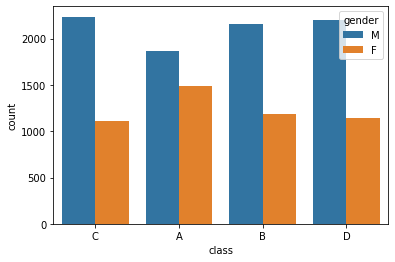

In [6]:
sns.countplot(df['class'], hue='gender', data=df)

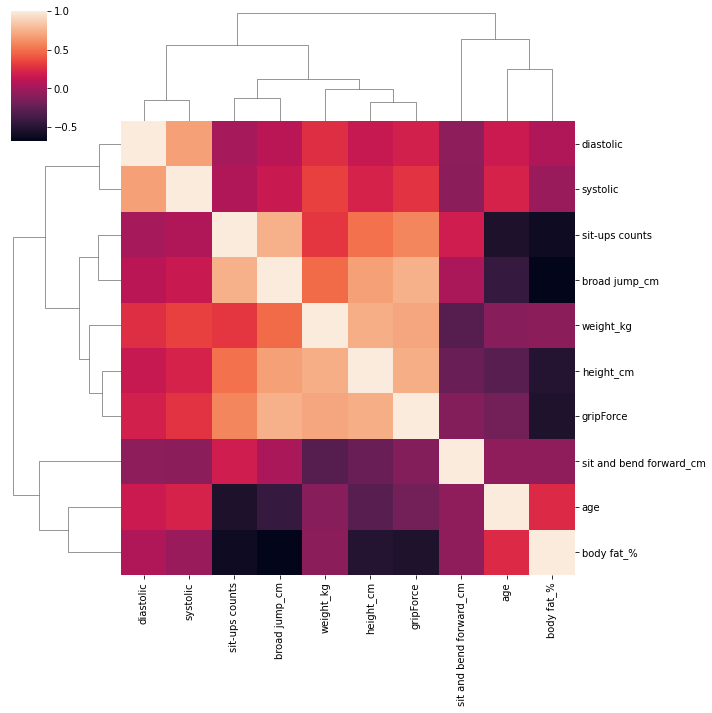

In [7]:
sns.clustermap(df.corr())

In [9]:
# Correlation with the class


df.corr()



,age,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm
age,1.000000,-0.293980,-0.099966,0.242302,0.158508,0.211167,-0.179583,-0.070033,-0.544581,-0.435172
height_cm,-0.293980,1.000000,0.734909,-0.515440,0.145933,0.210186,0.735024,-0.221970,0.500424,0.674589
weight_kg,-0.099966,0.734909,1.000000,-0.084065,0.262317,0.338943,0.700119,-0.296249,0.294899,0.479564
body fat_%,0.242302,-0.515440,-0.084065,1.000000,0.048059,-0.030376,-0.541788,-0.071225,-0.608912,-0.673273
diastolic,0.158508,0.145933,0.262317,0.048059,1.000000,0.676309,0.202062,-0.072098,0.016547,0.097243
systolic,0.211167,0.210186,0.338943,-0.030376,0.676309,1.000000,0.286012,-0.082434,0.056276,0.152894
gripForce,-0.179583,0.735024,0.700119,-0.541788,0.202062,0.286012,1.000000,-0.112577,0.576669,0.746853
sit and bend forward_cm,-0.070033,-0.221970,-0.296249,-0.071225,-0.072098,-0.082434,-0.112577,1.000000,0.177153,0.026487
sit-ups counts,-0.544581,0.500424,0.294899,-0.608912,0.016547,0.056276,0.576669,0.177153,1.000000,0.748273
broad jump_cm,-0.435172,0.674589,0.479564,-0.673273,0.097243,0.152894,0.746853,0.026487,0.748273,1.000000


In [10]:
# Let's change up the class column to numerical values


df['class_cat'] = pd.Categorical(df['class']).codes


In [28]:
df.shape

(13393, 13)

In [11]:
df

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class,class_cat
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C,2
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A,0
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C,2
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B,1
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13388,25.0,M,172.1,71.80,16.2,74.0,141.0,35.8,17.4,47.0,198.0,C,2
13389,21.0,M,179.7,63.90,12.1,74.0,128.0,33.0,1.1,48.0,167.0,D,3
13390,39.0,M,177.2,80.50,20.1,78.0,132.0,63.5,16.4,45.0,229.0,A,0
13391,64.0,F,146.1,57.70,40.4,68.0,121.0,19.3,9.2,0.0,75.0,D,3


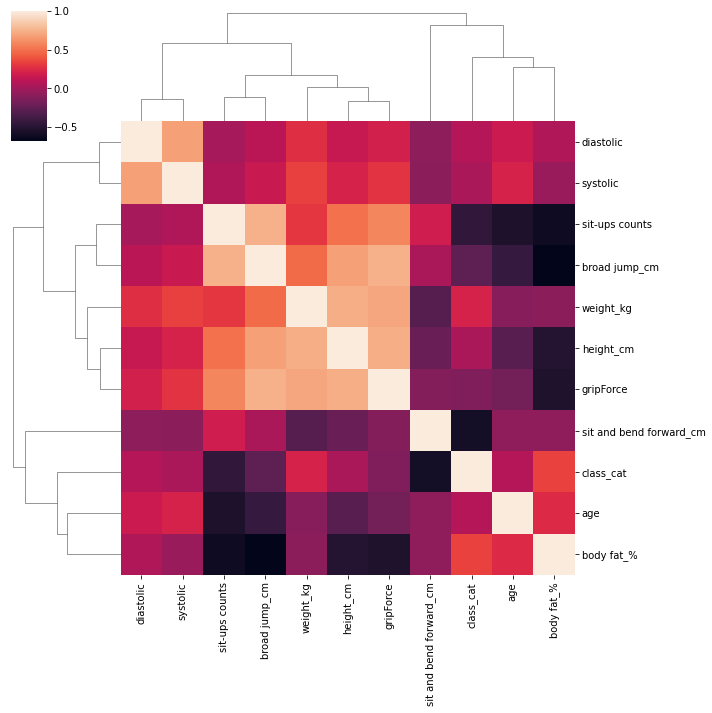

In [12]:
sns.clustermap(df.corr())

<AxesSubplot:>

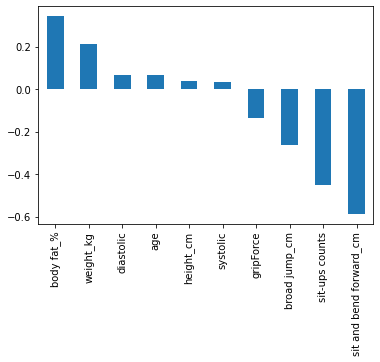

In [15]:
df.corr()['class_cat'].drop('class_cat').sort_values(ascending=False).plot(kind='bar')

In [16]:
# Data Cleanup
# Split the gender column using oneHotEncoding (get_dummies with a drop_first=True) and drop the gender column

dummies = pd.get_dummies(df['gender'], drop_first=True)
dummies





# Type your code above this line

,M
0,1
1,1
2,1
3,1
4,1
...,...
13388,1
13389,1
13390,1
13391,0


In [17]:
df = pd.concat([df, dummies], axis=1)

In [18]:
df

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class,class_cat,M
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C,2,1
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A,0,1
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C,2,1
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B,1,1
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13388,25.0,M,172.1,71.80,16.2,74.0,141.0,35.8,17.4,47.0,198.0,C,2,1
13389,21.0,M,179.7,63.90,12.1,74.0,128.0,33.0,1.1,48.0,167.0,D,3,1
13390,39.0,M,177.2,80.50,20.1,78.0,132.0,63.5,16.4,45.0,229.0,A,0,1
13391,64.0,F,146.1,57.70,40.4,68.0,121.0,19.3,9.2,0.0,75.0,D,3,0


In [19]:
df = df.drop('gender', axis=1)

In [20]:
df

,age,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class,class_cat,M
0,27.0,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C,2,1
1,25.0,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A,0,1
2,31.0,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C,2,1
3,32.0,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B,1,1
4,28.0,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13388,25.0,172.1,71.80,16.2,74.0,141.0,35.8,17.4,47.0,198.0,C,2,1
13389,21.0,179.7,63.90,12.1,74.0,128.0,33.0,1.1,48.0,167.0,D,3,1
13390,39.0,177.2,80.50,20.1,78.0,132.0,63.5,16.4,45.0,229.0,A,0,1
13391,64.0,146.1,57.70,40.4,68.0,121.0,19.3,9.2,0.0,75.0,D,3,0


In [26]:
# Train test split the data
# For the y values, split the outcomes into columns of their own
# Then train test split

X = df.drop(['class', 'class_cat'], axis=1).values

# y we want to split A B C and D and keep them as well
# All the columns have only 1 or 0, that's it, only one column is 'HOT', that's why it's called one hot encoding
y = pd.get_dummies(df['class_cat']).values

# y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Type your code above this line

In [24]:
X

array([[ 27.  , 172.3 ,  75.24, ...,  60.  , 217.  ,   1.  ],
       [ 25.  , 165.  ,  55.8 , ...,  53.  , 229.  ,   1.  ],
       [ 31.  , 179.6 ,  78.  , ...,  49.  , 181.  ,   1.  ],
       ...,
       [ 39.  , 177.2 ,  80.5 , ...,  45.  , 229.  ,   1.  ],
       [ 64.  , 146.1 ,  57.7 , ...,   0.  ,  75.  ,   0.  ],
       [ 34.  , 164.  ,  66.1 , ...,  51.  , 180.  ,   1.  ]])

In [27]:
# Scale the data from the train test split output
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)




# Type your code above this line

In [29]:
# Let's build out the model

# 3 Layers, 12 units per layers, relu activation
# Output layer has 4 units, and uses softmax
# Compilation uses the adam optimizer and categorical_crossentropy for loss
# Create an early stopping callback using min val_loss as the parameter with a patience of 20
# Fit the model with 1500 epochs

model = Sequential()

# Add the hidden layers
model.add(Dense(12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(12, activation='relu'))

# Output Layer
model.add(Dense(4, activation='softmax'))

# Compile method

model.compile(optimizer='adam', loss='categorical_crossentropy')

# Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', mode='min', patience=20)

# Fit
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1500, callbacks=[early_stopping])









# Type your code above this line

Epoch 1/1500


2022-06-15 22:25:04.488035: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


293/293 [==============================] - 2s 2ms/step - loss: 1.2951 - val_loss: 1.1252
Epoch 2/1500
293/293 [==============================] - 0s 2ms/step - loss: 1.0545 - val_loss: 1.0007
Epoch 3/1500
293/293 [==============================] - 0s 1ms/step - loss: 0.9872 - val_loss: 0.9418
Epoch 4/1500
293/293 [==============================] - 0s 1ms/step - loss: 0.9481 - val_loss: 0.9096
Epoch 5/1500
293/293 [==============================] - 0s 2ms/step - loss: 0.9140 - val_loss: 0.8900
Epoch 6/1500
293/293 [==============================] - 0s 2ms/step - loss: 0.8965 - val_loss: 0.8714
Epoch 7/1500
293/293 [==============================] - 0s 2ms/step - loss: 0.8834 - val_loss: 0.8635
Epoch 8/1500
293/293 [==============================] - 0s 2ms/step - loss: 0.8740 - val_loss: 0.8548
Epoch 9/1500
293/293 [==============================] - 0s 2ms/step - loss: 0.8687 - val_loss: 0.8434
Epoch 10/1500
293/293 [==============================] - 0s 2ms/step - loss: 0.8626 - val_loss:

293/293 [==============================] - 0s 1ms/step - loss: 0.6673 - val_loss: 0.6530
Epoch 81/1500
293/293 [==============================] - 0s 1ms/step - loss: 0.6780 - val_loss: 0.6422
Epoch 82/1500
293/293 [==============================] - 0s 1ms/step - loss: 0.6663 - val_loss: 0.6488
Epoch 83/1500
293/293 [==============================] - 0s 1ms/step - loss: 0.6686 - val_loss: 0.6492
Epoch 84/1500
293/293 [==============================] - 0s 1ms/step - loss: 0.6714 - val_loss: 0.6382
Epoch 85/1500
293/293 [==============================] - 0s 1ms/step - loss: 0.6675 - val_loss: 0.6416
Epoch 86/1500
293/293 [==============================] - 0s 1ms/step - loss: 0.6699 - val_loss: 0.6416
Epoch 87/1500
293/293 [==============================] - 0s 1ms/step - loss: 0.6680 - val_loss: 0.6549
Epoch 88/1500
293/293 [==============================] - 0s 1ms/step - loss: 0.6676 - val_loss: 0.6412
Epoch 89/1500
293/293 [==============================] - 0s 1ms/step - loss: 0.6648 - v

293/293 [==============================] - 0s 1ms/step - loss: 0.6368 - val_loss: 0.6225
Epoch 160/1500
293/293 [==============================] - 0s 1ms/step - loss: 0.6414 - val_loss: 0.6147
Epoch 161/1500
293/293 [==============================] - 0s 1ms/step - loss: 0.6437 - val_loss: 0.6269
Epoch 162/1500
293/293 [==============================] - 0s 2ms/step - loss: 0.6382 - val_loss: 0.6206
Epoch 163/1500
293/293 [==============================] - 0s 1ms/step - loss: 0.6433 - val_loss: 0.6188
Epoch 164/1500
293/293 [==============================] - 0s 1ms/step - loss: 0.6389 - val_loss: 0.6181
Epoch 165/1500
293/293 [==============================] - 0s 1ms/step - loss: 0.6370 - val_loss: 0.6152
Epoch 166/1500
293/293 [==============================] - 0s 1ms/step - loss: 0.6346 - val_loss: 0.6164
Epoch 167/1500
293/293 [==============================] - 0s 1ms/step - loss: 0.6423 - val_loss: 0.6165
Epoch 168/1500
293/293 [==============================] - 0s 1ms/step - loss: 0

<AxesSubplot:>

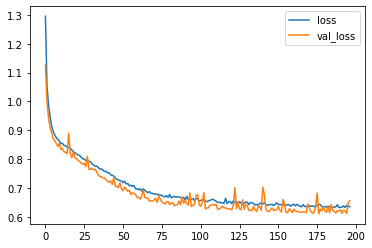

In [30]:
# Plot the losses after creating a dataframe from the losses

losses = pd.DataFrame(model.history.history)
losses.plot()





# Type your code above this line

In [33]:
# Run predictions on the model using X_test
# Don't forget to transform the data from a confidence value (floats) to ints

predictions = model.predict(X_test)


# Type your code above this line

126/126 [==============================] - 0s 804us/step


In [34]:
predictions

array([[0, 0, 0, 1],
       [1, 0, 0, 0],
       [0, 1, 0, 0],
       ...,
       [0, 1, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 1]])

In [36]:
actual = np.argmax(y_test, axis=1)

In [37]:
actual

array([3, 0, 2, ..., 1, 2, 3])

In [38]:
preds = np.argmax(predictions, axis=1)

In [39]:
preds

array([3, 0, 1, ..., 1, 2, 3])

In [41]:
# Evaluate using the Confusion Matrix and Classification Report

print(confusion_matrix(actual, preds))
print(classification_report(actual, preds))


# Type your code above this line

[[1026   12    1    1]
 [ 461  448   46   11]
 [ 198  181  583    7]
 [  68   45  151  779]]
              precision    recall  f1-score   support

           0       0.59      0.99      0.73      1040
           1       0.65      0.46      0.54       966
           2       0.75      0.60      0.67       969
           3       0.98      0.75      0.85      1043

    accuracy                           0.71      4018
   macro avg       0.74      0.70      0.70      4018
weighted avg       0.74      0.71      0.70      4018



In [51]:
# Run your own prediction on the data using the first row of the dataset
# How does it line up with the actual results?

np.argmax(model.predict(scaler.transform(df.loc[2].drop(['class','class_cat']).values.reshape(-1,11))), axis=1)





# Type your code above this line

1/1 [==============================] - 0s 22ms/step


array([2])

In [43]:
df

,age,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class,class_cat,M
0,27.0,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C,2,1
1,25.0,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A,0,1
2,31.0,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C,2,1
3,32.0,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B,1,1
4,28.0,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13388,25.0,172.1,71.80,16.2,74.0,141.0,35.8,17.4,47.0,198.0,C,2,1
13389,21.0,179.7,63.90,12.1,74.0,128.0,33.0,1.1,48.0,167.0,D,3,1
13390,39.0,177.2,80.50,20.1,78.0,132.0,63.5,16.4,45.0,229.0,A,0,1
13391,64.0,146.1,57.70,40.4,68.0,121.0,19.3,9.2,0.0,75.0,D,3,0
